# Lab 6-3  Temperature gradients in the air up to 20 m

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## User-provided inputs

Here we define a few variables to be used in the notebook. You may or may not want to change these values.

In [2]:
# Provide the path to a directory you want to download the SoS files to
download_directory = './sosnoqc/'

# Provide a the start and end dates you want to download
start_date = '20230131'
end_date = '20230202'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
# Right now we want the air temperature recordings
# These are available at every meter at the central (c) tower.  Sonic temperature is measured at 2, 5, and 10 m at the outer three towers.
# Sonic temperature is based on the speed of sound.  
# For comparison, we only download the 10 m sonic air temperature from all four towers (c, d, uw, ue).
# We also download pressure data to see if pressure fluctuations affect temperature.
VARIABLES = [
    'T_1m_c',
    'T_2m_c',
    'T_3m_c',
    'T_4m_c',
    'T_5m_c',
    'T_6m_c',
    'T_7m_c',
    'T_8m_c',
    'T_9m_c',
    'T_10m_c',
    'T_11m_c',
    'T_12m_c',
    'T_13m_c',
    'T_14m_c',
    'T_15m_c',
    'T_16m_c',
    'T_17m_c',
    'T_18m_c',
    'T_19m_c',
    'T_20m_c',
    'tc_10m_c',
    'tc_10m_d',
    'tc_10m_ue',
    'tc_10m_uw',
    'spd_10m_c',
    'spd_5m_c',
    'spd_3m_c',
    'spd_2m_c',
  #  'P_10m_d',
  #  'P_10m_uw',
  #  'P_10m_c',
  #  'P_10m_ue',
]

### Download SoS NetCDF files from an NCAR FTP server

Define a function for downloading daily SoS NetCDF filesm

In [3]:
def download_sos_data_day(date, local_download_dir, cache=True):
    """Download a netcdf file from the ftp url provided by the Earth Observing 
    Laboratory at NCAR. Data comes in one NetCDF file per day, Reynolds-Averaged 
    with a 5-minute averaging period.

    Args:
        date (str, optional): String representing a date in format '%Y%m%d'. Defaults to '20221101'.
        local_download_dir (str, optional): Directory to which files will be downloaded. Defaults 
                    to 'sosnoqc'; this directory will be created if it  does not already exist.
        cache (bool, optional): If True, looks in `local_download_dir` for requested  file, if it 
                    exists, does not redownload file. If False, downloads file from the FTP server.

    Returns:
        _type_: Relative path to the downloaded file
    """
    base_url = 'ftp.eol.ucar.edu'
    path = 'pub/archive/isfs/projects/SOS/netcdf/noqc_geo'
    file = f'isfs_{date}.nc'
    os.makedirs(local_download_dir, exist_ok=True)
    full_file_path = os.path.join('ftp://', base_url, path, file)
    download_file_path = os.path.join(local_download_dir, file)
    if cache and os.path.isfile(download_file_path):
        print(f"Caching...skipping download for {date}")
    else:
        urllib.request.urlretrieve(
            full_file_path,
            download_file_path   
        )
    return download_file_path

Use the function defined above to download all the files we specified. When you run the cell below this comment, this will ~3-5 minutes if you are downloading more than a few days.

In [4]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

Caching...skipping download for 20230131
Caching...skipping download for 20230201
Caching...skipping download for 20230202


### Open and and concatenate SoS datasets with Xarray

Note that as we open each individual file, we extract only the VARIABLES we defined above.  This may also take some time.

In [5]:
# Open up one day's dataset. We open this single dataset and keep all variables, so we can check out all that is available
example_complete_dataset = xr.open_dataset(files[0])

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset = xr.concat(all_datasets, dim='time')

#### Check out our SoS dataset

Note that our `dataset` has just the variables we are defined. Note that `example_complete_dataset` has 1047 variables.

In [6]:
sos_dataset

<xarray.Dataset>
Dimensions:    (time: 864)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-31T00:02:30 ... 2023-02-02T23:57:30
Data variables: (12/28)
    T_1m_c     (time) float32 -7.701 -7.711 -7.813 ... -10.73 -9.671 -9.469
    T_2m_c     (time) float32 -7.659 -7.666 -7.757 ... -8.455 -7.531 -6.869
    T_3m_c     (time) float32 -7.663 -7.669 -7.75 ... -7.605 -6.838 -6.108
    T_4m_c     (time) float32 -7.695 -7.7 -7.797 -7.867 ... -7.193 -6.378 -5.679
    T_5m_c     (time) float32 -7.656 -7.649 -7.758 ... -6.903 -5.977 -5.365
    T_6m_c     (time) float32 -7.703 -7.685 -7.819 -7.847 ... -6.662 -5.7 -5.151
    ...         ...
    tc_10m_ue  (time) float32 -8.023 -8.036 -8.182 -8.057 ... -6.06 -5.331 -4.8
    tc_10m_uw  (time) float32 -7.057 -7.006 -7.202 ... -5.333 -4.511 -4.141
    spd_10m_c  (time) float32 0.495 0.3096 0.974 1.172 ... nan 3.043 3.431 3.165
    spd_5m_c   (time) float32 0.5658 0.311 0.9113 1.31 ... nan 3.293 3.472 3.329
    spd_3m_c   (time) float32 0.5046 0.2616 0.8501 1.252 ... 3.144 3.288 3.194
    spd_2m_c   (time) float32 0.4914 0.2397 0.7936 1.247 ... 2.844 3.014 2.976
Attributes:
    history:                   Created: 2023-01-31 00:05:12 +0000\n
    NIDAS_version:             v1.2-1692
    calibration_file_path:     /h/eol/isfs/isfs/projects/SOS/ISFS/cal_files/n...
    project_config:            /h/eol/isfs/isfs/projects/SOS/ISFS/config/sos....
    wind3d_horiz_coordinates:  geographic
    file_length_seconds:       86400
    wind3d_horiz_rotation:     1
    wind3d_tilt_correction:    0

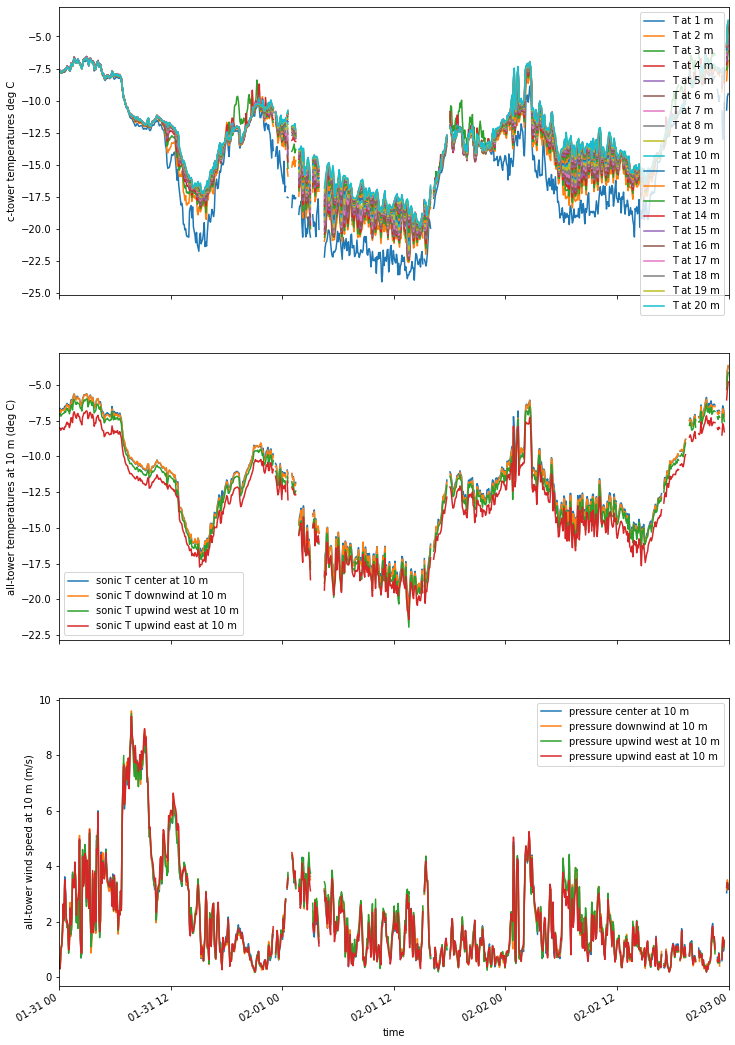

In [17]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(3, 1, figsize=(12,18), sharex=True)
sos_dataset['T_1m_c'].plot(ax=axes[0], label='T at 1 m')
sos_dataset['T_2m_c'].plot(ax=axes[0], label='T at 2 m')
sos_dataset['T_3m_c'].plot(ax=axes[0], label='T at 3 m')
sos_dataset['T_4m_c'].plot(ax=axes[0], label='T at 4 m')
sos_dataset['T_5m_c'].plot(ax=axes[0], label='T at 5 m')
sos_dataset['T_6m_c'].plot(ax=axes[0], label='T at 6 m')
sos_dataset['T_7m_c'].plot(ax=axes[0], label='T at 7 m')
sos_dataset['T_8m_c'].plot(ax=axes[0], label='T at 8 m')
sos_dataset['T_9m_c'].plot(ax=axes[0], label='T at 9 m')
sos_dataset['T_10m_c'].plot(ax=axes[0], label='T at 10 m')
sos_dataset['T_11m_c'].plot(ax=axes[0], label='T at 11 m')
sos_dataset['T_12m_c'].plot(ax=axes[0], label='T at 12 m')
sos_dataset['T_13m_c'].plot(ax=axes[0], label='T at 13 m')
sos_dataset['T_14m_c'].plot(ax=axes[0], label='T at 14 m')
sos_dataset['T_15m_c'].plot(ax=axes[0], label='T at 15 m')
sos_dataset['T_16m_c'].plot(ax=axes[0], label='T at 16 m')
sos_dataset['T_17m_c'].plot(ax=axes[0], label='T at 17 m')
sos_dataset['T_18m_c'].plot(ax=axes[0], label='T at 18 m')
sos_dataset['T_19m_c'].plot(ax=axes[0], label='T at 19 m')
sos_dataset['T_20m_c'].plot(ax=axes[0], label='T at 20 m')

sos_dataset['tc_10m_c'].plot(ax=axes[1], label='sonic T center at 10 m')
sos_dataset['tc_10m_d'].plot(ax=axes[1], label='sonic T downwind at 10 m')
sos_dataset['tc_10m_uw'].plot(ax=axes[1], label='sonic T upwind west at 10 m')
sos_dataset['tc_10m_ue'].plot(ax=axes[1], label='sonic T upwind east at 10 m')

#sos_dataset['P_10m_c'].plot(ax=axes[2], label='pressure center at 10 m')
#sos_dataset['P_10m_d'].plot(ax=axes[2], label='pressure downwind at 10 m')
#sos_dataset['P_10m_uw'].plot(ax=axes[2], label='pressure upwind west at 10 m')
#sos_dataset['P_10m_ue'].plot(ax=axes[2], label='pressure upwind east at 10 m')

sos_dataset['spd_10m_c'].plot(ax=axes[2], label='center at 10 m')
sos_dataset['spd_5m_c'].plot(ax=axes[2], label='center at 5 m')
sos_dataset['spd_3m_c'].plot(ax=axes[2], label='center at 3 m')
sos_dataset['spd_2m_c'].plot(ax=axes[2], label='center at 2 m')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("c-tower temperatures deg C")
axes[1].set_ylabel("all-tower temperatures at 10 m (deg C)")
#axes[2].set_ylabel("all-tower pressures at 10 m (hPa)")
axes[2].set_ylabel("wind speeds (m/s)")
axes[0].set_xlim(dt.datetime(2023,1,31), dt.datetime(2023,2,3))
plt.show()

#### Wow, these temperatures bounce around a lot at night.  Let's look at the early morning of 1 February  more closely.

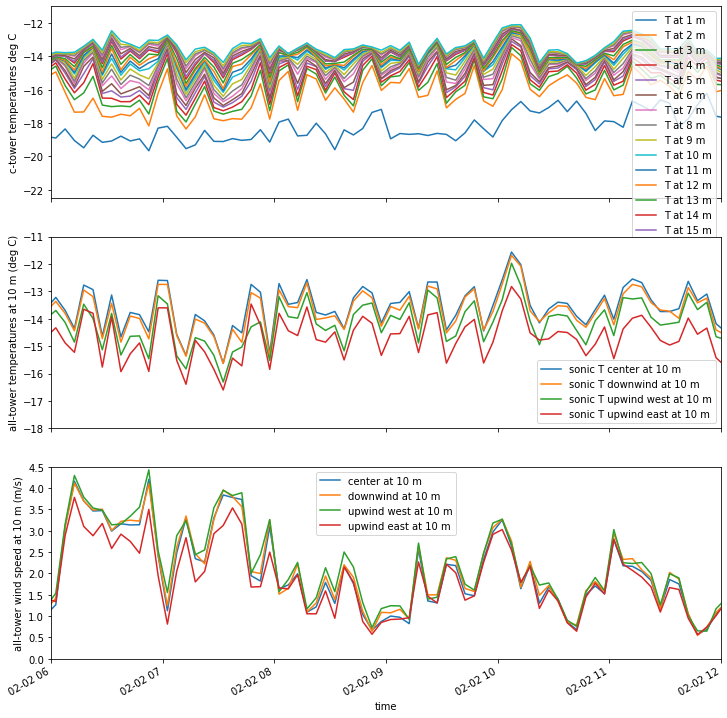

In [20]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True)
sos_dataset['T_1m_c'].plot(ax=axes[0], label='T at 1 m')
sos_dataset['T_2m_c'].plot(ax=axes[0], label='T at 2 m')
sos_dataset['T_3m_c'].plot(ax=axes[0], label='T at 3 m')
sos_dataset['T_4m_c'].plot(ax=axes[0], label='T at 4 m')
sos_dataset['T_5m_c'].plot(ax=axes[0], label='T at 5 m')
sos_dataset['T_6m_c'].plot(ax=axes[0], label='T at 6 m')
sos_dataset['T_7m_c'].plot(ax=axes[0], label='T at 7 m')
sos_dataset['T_8m_c'].plot(ax=axes[0], label='T at 8 m')
sos_dataset['T_9m_c'].plot(ax=axes[0], label='T at 9 m')
sos_dataset['T_10m_c'].plot(ax=axes[0], label='T at 10 m')
sos_dataset['T_11m_c'].plot(ax=axes[0], label='T at 11 m')
sos_dataset['T_12m_c'].plot(ax=axes[0], label='T at 12 m')
sos_dataset['T_13m_c'].plot(ax=axes[0], label='T at 13 m')
sos_dataset['T_14m_c'].plot(ax=axes[0], label='T at 14 m')
sos_dataset['T_15m_c'].plot(ax=axes[0], label='T at 15 m')
sos_dataset['T_16m_c'].plot(ax=axes[0], label='T at 16 m')
sos_dataset['T_17m_c'].plot(ax=axes[0], label='T at 17 m')
sos_dataset['T_18m_c'].plot(ax=axes[0], label='T at 18 m')
sos_dataset['T_19m_c'].plot(ax=axes[0], label='T at 19 m')
sos_dataset['T_20m_c'].plot(ax=axes[0], label='T at 20 m')

sos_dataset['tc_10m_c'].plot(ax=axes[1], label='sonic T center at 10 m')
sos_dataset['tc_10m_d'].plot(ax=axes[1], label='sonic T downwind at 10 m')
sos_dataset['tc_10m_uw'].plot(ax=axes[1], label='sonic T upwind west at 10 m')
sos_dataset['tc_10m_ue'].plot(ax=axes[1], label='sonic T upwind east at 10 m')

#sos_dataset['P_10m_c'].plot(ax=axes[2], label='pressure center at 10 m')
#sos_dataset['P_10m_d'].plot(ax=axes[2], label='pressure downwind at 10 m')
#sos_dataset['P_10m_uw'].plot(ax=axes[2], label='pressure upwind west at 10 m')
#sos_dataset['P_10m_ue'].plot(ax=axes[2], label='pressure upwind east at 10 m')

sos_dataset['spd_10m_c'].plot(ax=axes[2], label='center at 10 m')
sos_dataset['spd_5m_c'].plot(ax=axes[2], label='center at 5 m')
sos_dataset['spd_3m_c'].plot(ax=axes[2], label='center at 3 m')
sos_dataset['spd_2m_c'].plot(ax=axes[2], label='center at 2 m')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("c-tower temperatures deg C")
axes[1].set_ylabel("all-tower temperatures at 10 m (deg C)")
#axes[2].set_ylabel("all-tower pressures at 10 m (hPa)")
axes[2].set_ylabel("wind speeds (m/s)")
axes[0].set_xlim(dt.datetime(2023,2,2,6,0,0), dt.datetime(2023,2,2,12,0,0))
axes[1].set_ylim(-18, -11)
axes[0].set_ylim(-22.5, -11)
#axes[2].set_ylim(721.2, 722.5)
axes[2].set_ylim(0, 4.5)
plt.show()

**Wow, this is really fun.  I think we have a scientific paper here, all as part of a class lab.  Isn't that exciting?**

First thing to note is (a) that sonic temperature isn't exactly the same as the true air temperature (ha, and you thought brightness temperature was bad) and that the sonic temperatures were not calibrated in an absolute sense as well as the center tower temperatures.  But their fluctuations are totally trustworthy, and if there are waves propagating through, we might expect to see phase shifts horizontally...  

Second, we are looking at a stable noctural boundary layer, where temperature increases with height.

Next, it looks like the 1 m temperature sensor is quite decoupled from the rest, and the 2 m temperature sensor undergoes the most extreme oscillations.  Next week, when we study flux, we can assess what this means in terms of fluxes of heat and moisture through the stable boundary layer.

**Work on your own.**  Try a different period and see if these fluctuations are common every night, or if this is just a particularly odd day to pick.  Why do you think there are differences between days?  You can see that I tried comparing with both pressure and wind speed -- the wind speed seems to oscillate similarly at some times but not all the times.  We will investigate turbulent fluxes more in Lab 7.

## Stability
For the final portion of this very exciting lab and homework, we need to determine tha [stability of the atmospheric boundary layer](https://glossary.ametsoc.org/wiki/Static_stability).  This is an important concept before we advance to turbulence next week.

At it's most basic, stability relates to the fact that warm air is less dense than cool air, and if perturbed, will often continue rising.  We must consider stability in terms of [potential temperature](https://en.wikipedia.org/wiki/Potential_temperature), $ \theta $, which is temperature adjusted for the affects of pressure changes as a parcel rises. 

From our observations the difference in pressure between the surface and 10 meters elevation is 0.6 hPa, with the surface at 722.1 hPa and 10 m at 271.5 hPa.  I do a quick calculation below to see if this matters.

In [5]:
testsurf = (1000/722.1)**(0.286)
print(testsurf)
test10m = (1000/721.5)**(0.286)
print(test10m)

1.097592572160553
1.0978535437409132


This difference is very slight, with differences only in the hundred-thousandths place, so we will presume, for now, that for near-surface temperatures as they are, not converted to potential temperatures, are sufficient to analyze stability.  When we use higher elevations (in balloon soundings) and/or when we need very high precision, we must remember to convert. 

# To assess stability, we need to assign a vertical coordinate to our xarray dataframe.
Here, I do this with coding help from ChatGPT.  This is probably not as good as our class coding experts would do, but it functions!

In [9]:
#import xarray as xr
ds = sos_dataset;

# combine the air temperature variables into one variable with a new 'height' dimension
height_coords = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
data_vars = [ds[f'T_{i}m_c'] for i in height_coords]
new_da = xr.concat(data_vars, dim='height')
new_da.coords['height'] = height_coords

# rename the new variable
new_da = new_da.rename('T')

# print the new dataset
print(new_da)


<xarray.DataArray 'T' (height: 20, time: 864)>
array([[ -7.700614 ,  -7.711175 ,  -7.8126945, ..., -10.728058 ,
         -9.67089  ,  -9.468906 ],
       [ -7.658923 ,  -7.6657753,  -7.7568793, ...,  -8.45543  ,
         -7.531047 ,  -6.8689666],
       [ -7.6634283,  -7.669397 ,  -7.749903 , ...,  -7.605059 ,
         -6.8375   ,  -6.1083236],
       ...,
       [ -7.7016454,  -7.704623 ,  -7.815933 , ...,  -5.692781 ,
         -4.2053447,  -3.8605733],
       [ -7.708323 ,  -7.708561 ,  -7.830403 , ...,  -5.63873  ,
         -4.133572 ,  -3.814554 ],
       [ -7.6937847,  -7.708185 ,  -7.8200912, ...,  -5.560834 ,
         -4.049147 ,  -3.7338614]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-31T00:02:30 ... 2023-02-02T23:57:30
  * height   (height) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    long_name:   Air Temperature, NCAR hygrothermometer
    short_name:  T.1m.c
    units:       degC


In [10]:
# That actually looks good (there is an art to talking to a computer for coding help)
# save the modified dataset to a new file (optional)
new_da.to_netcdf('Tair_time_with_height.nc')

In [37]:
# This is useful to make sure that the time you want exists
print(new_da.time[670])

<xarray.DataArray 'time' ()>
array('2023-02-02T07:52:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-02-02T07:52:30
Attributes:
    interval(sec):  300.0


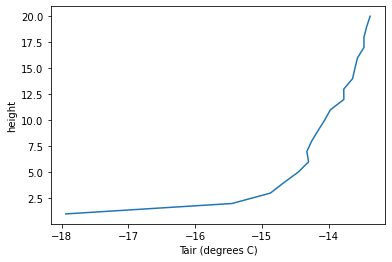

In [36]:
# Now we take a timeslice and make a vertical plot

# select a specific time slice (replace with the desired time)
# You can choose to either write out the time or just match its index using the above

#T_slice = new_da.sel(time=new_da.time[800])
T_slice = new_da.sel(time='2023-02-02T08:02:30.000000000')

# plot the slice of T vs. height
plt.plot(T_slice, T_slice['height'])
plt.xlabel('Tair (degrees C)')
plt.ylabel('height')
plt.show()


Look at the different slopes (dT/dz) of this inversion.  You can see that the slope is strongest near the surface (first two meters) and then much less strong above.  In the homework, I ask you to calculate these slopes.  If you are not strong at coding, it's fine to just use the graph (or the actual data) to estimate dT/dz.  If you feel confident coding, use linear regression over all 20 points and for just the bottom two points (which you can actually directly calculate without linear regression).  

Note that this plot is very stable because temperature increases with height.  We often say a stable atmosphere has an inversion, which is another way of saying that temperature increases with height.  If perturbed the air near the surface is not likely to rise any more but rather to sink back down because it is dense.